In [1]:
import requests
from bs4 import BeautifulSoup

def scrape_recipes_page(page_number):
    base_url = "https://recipes.lewagon.com/"
    params = {
        "page": page_number
    }

    response = requests.get(base_url, params=params)

    if response.status_code == 200:
        soup = BeautifulSoup(response.content, "html.parser")
        return soup
    else:
        print(f"Erreur lors de la récupération de la page {page_number}.")
        return None

if __name__ == "__main__":
    total_pages = 123
    min_recipes_per_page = 4
    max_recipes_per_page = 13

    full_recipe_links = []  # Liste pour stocker les liens
    
    for page_number in range(1, total_pages + 1):
        list_soup = scrape_recipes_page(page_number)

        if list_soup:
            recipe_articles = list_soup.find_all("div", class_="recipe my-3")
            num_recipes_on_page = min(max_recipes_per_page, max(min_recipes_per_page, len(recipe_articles)))
            
            for i in range(num_recipes_on_page):
                recipe_link = recipe_articles[i]["data-href"]
                full_recipe_link = recipe_link
                full_recipe_links.append(full_recipe_link)  # Ajout à la liste
        else:
            print(f"Impossible de récupérer la liste des recettes pour la page {page_number}.")


In [2]:
full_recipe_links

['https://recipes.lewagon.com/recipes/1410',
 'https://recipes.lewagon.com/recipes/803',
 'https://recipes.lewagon.com/recipes/877',
 'https://recipes.lewagon.com/recipes/31',
 'https://recipes.lewagon.com/recipes/92',
 'https://recipes.lewagon.com/recipes/1265',
 'https://recipes.lewagon.com/recipes/1281',
 'https://recipes.lewagon.com/recipes/361',
 'https://recipes.lewagon.com/recipes/34',
 'https://recipes.lewagon.com/recipes/523',
 'https://recipes.lewagon.com/recipes/195',
 'https://recipes.lewagon.com/recipes/447',
 'https://recipes.lewagon.com/recipes/933',
 'https://recipes.lewagon.com/recipes/1463',
 'https://recipes.lewagon.com/recipes/1452',
 'https://recipes.lewagon.com/recipes/1335',
 'https://recipes.lewagon.com/recipes/665',
 'https://recipes.lewagon.com/recipes/703',
 'https://recipes.lewagon.com/recipes/1009',
 'https://recipes.lewagon.com/recipes/936',
 'https://recipes.lewagon.com/recipes/1367',
 'https://recipes.lewagon.com/recipes/163',
 'https://recipes.lewagon.c

In [3]:
len(full_recipe_links)

1469

In [7]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

def extract_preparation_duration(description_text):
    duration_pattern = r"(\d+)\s*minutes"
    duration_match = re.search(duration_pattern, description_text)
    if duration_match:
        preparation_duration = duration_match.group(1)
        return preparation_duration
    return None


def scrape_recipe_info(recipe_url):
    response = requests.get(recipe_url)

    if response.status_code == 200:
        recipe_soup = BeautifulSoup(response.content, "html.parser")

        name = recipe_soup.find("h2").text.strip()

        img_element = recipe_soup.find("img", class_="recipe-img mb-3 mb-md-0")
        img_url = img_element['src'] if img_element else ''

        ingredient_spans = recipe_soup.find_all("p", class_="mb-0")
        ingredients = [span.text.strip() for span in ingredient_spans]

        description_element = recipe_soup.find("p", class_="text-justify recipe-description")
        description_text = description_element.get_text() if description_element else ""
        duration = extract_preparation_duration(description_text)

        difficulty_element = recipe_soup.find("span", class_="recipe-difficulty")
        difficulty = difficulty_element.text.strip() if difficulty_element else ""

        return {
            "name": name,
            "ingredients": ingredients,
            "duration": duration,
            "difficulty": difficulty,
            "img_url": img_url
        }
    else:
        print(f"Erreur lors de la récupération de la recette {recipe_url}.")
        return None

if __name__ == "__main__":
    full_recipe_links = full_recipe_links

    recipes_data = []

    for full_recipe_link in full_recipe_links:
        recipe_info = scrape_recipe_info(full_recipe_link)
        if recipe_info:
            recipes_data.append(recipe_info)

    df = pd.DataFrame(recipes_data)
    print(df)


                                                   name  \
0             15 Minute Healthy Dark Chocolate Truffles   
1                           17 Bean White Chicken Chili   
2                                2 Minute Chocolate Yum   
3     3 Steps for the Best Sheet Pan Chicken and Veg...   
4         4 Ingredient Raw Peanut Butter Chocolate Cups   
...                                                 ...   
1464                          Zucchini & Basil Frittata   
1465      Zucchini Burgers with Lemon Herb Yogurt Sauce   
1466                          Zucchini Chicken Omelette   
1467                         Zucchini Quiche Appetizers   
1468                        Zucchini Ribbon Caper Salad   

                                            ingredients duration difficulty  \
0     [15 dried dates, pitted, 3/4 cups sliced or sl...       45   Moderate   
1     [1 pound Assorted Dry Beans, Cooked According ...       45       Hard   
2     [2 tablespoons Cocoa Powder, 1 Egg, slightly b..

In [8]:
data = df.copy()

In [9]:
data['URL'] = full_recipe_links
data

,name,ingredients,duration,difficulty,img_url,URL
0,15 Minute Healthy Dark Chocolate Truffles,"[15 dried dates, pitted, 3/4 cups sliced or sl...",45,Moderate,https://spoonacular.com/recipeImages/631841-55...,https://recipes.lewagon.com/recipes/1410
1,17 Bean White Chicken Chili,"[1 pound Assorted Dry Beans, Cooked According ...",45,Hard,https://spoonacular.com/recipeImages/631843-55...,https://recipes.lewagon.com/recipes/803
2,2 Minute Chocolate Yum,"[2 tablespoons Cocoa Powder, 1 Egg, slightly b...",45,Very hard,https://spoonacular.com/recipeImages/631849-55...,https://recipes.lewagon.com/recipes/877
3,3 Steps for the Best Sheet Pan Chicken and Veg...,"[fresh and dried herbs, 8-14 pieces asparagus,...",35,Hard,https://spoonacular.com/recipeImages/1045246-5...,https://recipes.lewagon.com/recipes/31
4,4 Ingredient Raw Peanut Butter Chocolate Cups,"[2 to 3 tablespoons coconut flour, as needed, ...",45,Very hard,https://spoonacular.com/recipeImages/792705-55...,https://recipes.lewagon.com/recipes/92
...,...,...,...,...,...,...
1464,Zucchini & Basil Frittata,"[12 leaves basil, chopped, 1/2 cup cheddar che...",45,Moderate,https://spoonacular.com/recipeImages/665691-55...,https://recipes.lewagon.com/recipes/14
1465,Zucchini Burgers with Lemon Herb Yogurt Sauce,"[1/2 cup bread crumbs, 1/2 cup Diced cheddar c...",45,Moderate,https://spoonacular.com/recipeImages/665721-55...,https://recipes.lewagon.com/recipes/524
1466,Zucchini Chicken Omelette,"[3 Eggs, 1 tablespoon Water, 150 grams Zucchin...",45,Moderate,https://spoonacular.com/recipeImages/665734-55...,https://recipes.lewagon.com/recipes/485
1467,Zucchini Quiche Appetizers,"[3 cups zucchini, grated, 1 cup Bisquick, 1/2 ...",45,Hard,https://spoonacular.com/recipeImages/665778-55...,https://recipes.lewagon.com/recipes/720


In [10]:
def clean_ingredient(ingredient):
    cleaned_ingredient = re.sub(r"\d+|/", "", ingredient).strip()
    return cleaned_ingredient

# Appliquer la fonction à chaque ingrédient dans la colonne "ingredients"
data['ingredients'] = data['ingredients'].apply(lambda ingredients: [clean_ingredient(ingredient) for ingredient in ingredients])

# Afficher le DataFrame mis à jour
data

,name,ingredients,duration,difficulty,img_url,URL
0,15 Minute Healthy Dark Chocolate Truffles,"[dried dates, pitted, cups sliced or slivered ...",45,Moderate,https://spoonacular.com/recipeImages/631841-55...,https://recipes.lewagon.com/recipes/1410
1,17 Bean White Chicken Chili,"[pound Assorted Dry Beans, Cooked According to...",45,Hard,https://spoonacular.com/recipeImages/631843-55...,https://recipes.lewagon.com/recipes/803
2,2 Minute Chocolate Yum,"[tablespoons Cocoa Powder, Egg, slightly beate...",45,Very hard,https://spoonacular.com/recipeImages/631849-55...,https://recipes.lewagon.com/recipes/877
3,3 Steps for the Best Sheet Pan Chicken and Veg...,"[fresh and dried herbs, - pieces asparagus, ba...",35,Hard,https://spoonacular.com/recipeImages/1045246-5...,https://recipes.lewagon.com/recipes/31
4,4 Ingredient Raw Peanut Butter Chocolate Cups,"[to tablespoons coconut flour, as needed, oz ...",45,Very hard,https://spoonacular.com/recipeImages/792705-55...,https://recipes.lewagon.com/recipes/92
...,...,...,...,...,...,...
1464,Zucchini & Basil Frittata,"[leaves basil, chopped, cup cheddar cheese, eg...",45,Moderate,https://spoonacular.com/recipeImages/665691-55...,https://recipes.lewagon.com/recipes/14
1465,Zucchini Burgers with Lemon Herb Yogurt Sauce,"[cup bread crumbs, cup Diced cheddar cheese, c...",45,Moderate,https://spoonacular.com/recipeImages/665721-55...,https://recipes.lewagon.com/recipes/524
1466,Zucchini Chicken Omelette,"[Eggs, tablespoon Water, grams Zucchini, grate...",45,Moderate,https://spoonacular.com/recipeImages/665734-55...,https://recipes.lewagon.com/recipes/485
1467,Zucchini Quiche Appetizers,"[cups zucchini, grated, cup Bisquick, cup fine...",45,Hard,https://spoonacular.com/recipeImages/665778-55...,https://recipes.lewagon.com/recipes/720


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords

# Téléchargement des stopwords en anglais si ce n'est pas déjà fait
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Prétraitement des ingrédients (mise en minuscules, suppression de la ponctuation et des stopwords)
def preprocess_ingredients(ingredient_list):
    processed_ingredients = []
    removed_stopwords = []
    for ingredient in ingredient_list:
        ingredient_lower = ingredient.lower().replace(',', '').replace('.', '')
        if ingredient_lower not in stop_words:
            processed_ingredients.append(ingredient_lower)
        else:
            removed_stopwords.append(ingredient_lower)
    return processed_ingredients, removed_stopwords

data['ingredients_processed'], data['removed_stopwords'] = zip(*data['ingredients'].apply(preprocess_ingredients))


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/lewagoncassien/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
data['removed_stopwords'].value_counts()

[]    1469
Name: removed_stopwords, dtype: int64

In [181]:
data

,name,ingredients,duration,difficulty,URL,ingredients_processed,removed_stopwords
0,15 Minute Healthy Dark Chocolate Truffles,"[dried dates, pitted, cups sliced or slivered ...",45,Moderate,https://recipes.lewagon.com/recipes/1410,"[dried dates pitted, cups sliced or slivered a...",[]
1,17 Bean White Chicken Chili,"[pound Assorted Dry Beans, Cooked According to...",45,Hard,https://recipes.lewagon.com/recipes/803,[pound assorted dry beans cooked according to ...,[]
2,2 Minute Chocolate Yum,"[tablespoons Cocoa Powder, Egg, slightly beate...",45,Very hard,https://recipes.lewagon.com/recipes/877,"[tablespoons cocoa powder, egg slightly beaten...",[]
3,3 Steps for the Best Sheet Pan Chicken and Veg...,"[fresh and dried herbs, - pieces asparagus, ba...",35,Hard,https://recipes.lewagon.com/recipes/31,"[fresh and dried herbs, - pieces asparagus, ba...",[]
4,4 Ingredient Raw Peanut Butter Chocolate Cups,"[to tablespoons coconut flour, as needed, oz ...",45,Very hard,https://recipes.lewagon.com/recipes/92,"[to tablespoons coconut flour as needed, oz (...",[]
...,...,...,...,...,...,...,...
1464,Zucchini & Basil Frittata,"[leaves basil, chopped, cup cheddar cheese, eg...",45,Moderate,https://recipes.lewagon.com/recipes/14,"[leaves basil chopped, cup cheddar cheese, egg...",[]
1465,Zucchini Burgers with Lemon Herb Yogurt Sauce,"[cup bread crumbs, cup Diced cheddar cheese, c...",45,Moderate,https://recipes.lewagon.com/recipes/524,"[cup bread crumbs, cup diced cheddar cheese, c...",[]
1466,Zucchini Chicken Omelette,"[Eggs, tablespoon Water, grams Zucchini, grate...",45,Moderate,https://recipes.lewagon.com/recipes/485,"[eggs, tablespoon water, grams zucchini grated...",[]
1467,Zucchini Quiche Appetizers,"[cups zucchini, grated, cup Bisquick, cup fine...",45,Hard,https://recipes.lewagon.com/recipes/720,"[cups zucchini grated, cup bisquick, cup finel...",[]


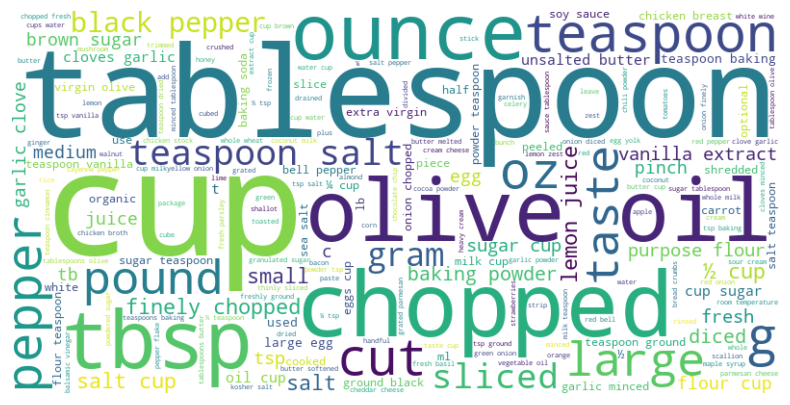

In [182]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Création d'une chaîne de texte unique à partir des ingrédients
all_ingredients = ' '.join(data['ingredients_processed'].apply(' '.join))

# Création du nuage de mots
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_ingredients)

# Affichage du nuage de mots
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
from collections import Counter

# Création d'une liste de tous les ingrédients
all_ingredients_list = [ingredient for sublist in data['ingredients_processed'] for ingredient in sublist]

# Comptage des occurrences des ingrédients
ingredient_counter = Counter(all_ingredients_list)

# Tri des ingrédients par fréquence décroissante
sorted_ingredients = sorted(ingredient_counter.items(), key=lambda x: x[1], reverse=True)

# Affichage des ingrédients triés par fréquence décroissante
for ingredient, count in sorted_ingredients:
    print(f"{ingredient}: {count}")

In [13]:
foods = [
    # Meats and Fish
    "chicken", "beef", "pork", "lamb", "veal", "turkey", "duck", "fish", "salmon", "tuna",
    "shrimp", "mussels", "oysters", "bacon", "ham",
    
    # Vegetables
    "carrot", "potato", "tomato", "onion", "garlic", "spinach", "broccoli", "zucchini", "eggplant",
    "bell pepper", "mushroom", "green beans", "asparagus", "cabbage", "celery", "cucumber"
    
    # Fruits
    "apple", "banana", "orange", "strawberries", "grapes", "pear", "pineapple", "kiwi", "melon", "mango", "avocado",
    "cherry", "raspberry", "blueberry", "lime", "lemon", "coconut"
    
    # Dairy Products
    "milk", "cheese", "butter", "yogurt", "cream", "ice cream",
    
    # Grains
    "rice", "pasta", "bread", "flour", "oats", "barley", "quinoa",
    
    # Legumes
    "red beans", "lentils", "chickpeas", "fava beans",
    
    # Herbs and Spices
    "basil", "parsley", "thyme", "rosemary", "oregano", "cumin", "coriander", "cinnamon", "turmeric", "paprika",
    "pepper", "salt",
    
    # Condiments and Sauces
    "ketchup", "mustard", "mayonnaise", "balsamic vinegar", "soy sauce", "tomato sauce", "barbecue sauce",
    "hot sauce", "olive oil", "vinaigrette", "mint"
    
    # Nuts and Seeds
    "almonds", "cashews", "walnuts", "pistachios", "sunflower seeds", "sesame seeds", "chia seeds",
    
    # Sweeteners
    "sugar", "honey", "maple syrup", "stevia", "syrup","chocolate"
    
    # Beverages
    "water", "coffee","fruit juice", "almond milk", "coconut milk",
    
    # Others
    "eggs", "egg", "almond flour", "coconut flour", "yeast", "sourdough starter"
]


In [14]:
# Compteur pour le nombre de lignes contenant au moins un aliment
count_lines_with_food = 0

# Parcourir les lignes de votre dataframe
for index, row in data.iterrows():
    ingredients = row['ingredients_processed']
    for ingredient in ingredients:
        if any(food in ingredient for food in foods):
            count_lines_with_food += 1
            break  # Sortir de la boucle interne dès qu'un aliment est trouvé dans la recette

print(f"Nombre de lignes contenant au moins un aliment de la liste : {count_lines_with_food}")

Nombre de lignes contenant au moins un aliment de la liste : 1465


In [15]:
# Fonction pour nettoyer une liste d'ingrédients en ne gardant que les aliments
def clean_ingredients(ingredients):
    cleaned_ingredients = []
    for ingredient in ingredients:
        # Supprimer les parenthèses collées à un mot
        ingredient = re.sub(r'(\w+)\)', r'\1', ingredient)
        
        words = ingredient.split()
        new_words = [word for word in words if any(food in word for food in foods)]
        cleaned_ingredient = ', '.join(new_words)
        if cleaned_ingredient:  # Vérifier si la chaîne n'est pas vide
            cleaned_ingredients.append(cleaned_ingredient)
    return cleaned_ingredients

# Appliquer la fonction à la colonne d'ingrédients dans le dataframe
data['cleaned_ingredients'] = data['ingredients_processed'].apply(clean_ingredients)

In [16]:
data['cleaned_ingredients']

0                                           [honey, salt]
1       [chicken, chicken, pepper, onion, garlic, toma...
2                               [egg, flour, salt, sugar]
3       [asparagus, zucchini, chicken, cheese, salt, p...
4                                  [flour, syrup, butter]
                              ...                        
1464    [basil, cheese, eggs, grapeseed, onions, salt,...
1465    [bread, cheese, parsley, eggs, hamburger, lemo...
1466              [eggs, zucchini, salt, pepper, chicken]
1467    [zucchini, onion, cheese, parsley, salt, orega...
1468      [garlic, lemon, salt, pepper, tomato, zucchini]
Name: cleaned_ingredients, Length: 1469, dtype: object

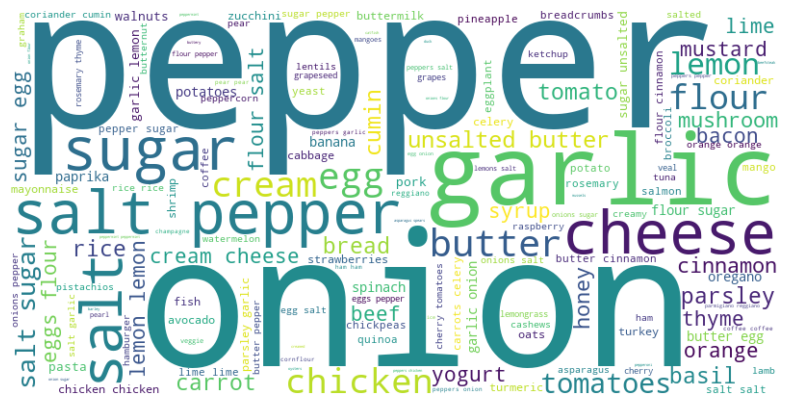

In [193]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Création d'une chaîne de texte unique à partir des ingrédients
all_ingredients = ' '.join(data['cleaned_ingredients'].apply(' '.join))

# Création du nuage de mots
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_ingredients)

# Affichage du nuage de mots
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [194]:
# Conversion des listes d'ingrédients prétraitées en phrases pour l'entrée du TfidfVectorizer
ingredient_sentences = data['cleaned_ingredients'].apply(lambda x: ' '.join(x))

# Instanciation et ajustement du TfidfVectorizer
vectorizer = TfidfVectorizer()
ingredients_tfidf = vectorizer.fit_transform(ingredient_sentences)

# Conversion de la matrice TF-IDF en DataFrame
ingredients_tfidf_df = pd.DataFrame(ingredients_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

# Concaténation du DataFrame d'origine avec le DataFrame TF-IDF
data = pd.concat([data, ingredients_tfidf_df], axis=1)

# Affichage des stopwords supprimés pour chaque recette
for index, row in data.iterrows():
    print(f"Removed stopwords for '{row['name']}': {row['removed_stopwords']}")


Removed stopwords for '15 Minute Healthy Dark Chocolate Truffles': []
Removed stopwords for '17 Bean White Chicken Chili': []
Removed stopwords for '2 Minute Chocolate Yum': []
Removed stopwords for '3 Steps for the Best Sheet Pan Chicken and Veggies': []
Removed stopwords for '4 Ingredient Raw Peanut Butter Chocolate Cups': []
Removed stopwords for '5-Minute Blueberry Chia Jam': []
Removed stopwords for '5 Minute Gluten Free Wonder Buns': []
Removed stopwords for '5-Minute Rocky Road Fudge': []
Removed stopwords for '5 Minute Xocai Chocolate Mug Cake': []
Removed stopwords for '90 Second Cookie in a Bowl': []
Removed stopwords for 'A Christmas With Peking Duck': []
Removed stopwords for 'A Classic Caesar Salad': []
Removed stopwords for 'African Chicken Peanut Stew': []
Removed stopwords for 'Agave Glazed Carrots': []
Removed stopwords for 'Agedashi Tofu': []
Removed stopwords for 'A Healthy & Tasty Banana Shake': []
Removed stopwords for 'Ahi Tuna Ceviche': []
Removed stopwords for '

In [195]:
data

,name,ingredients,duration,difficulty,URL,ingredients_processed,removed_stopwords,cleaned_ingredients,asparagus,avocado,...,veggies,vinaigrette,walnuts,walnutspecans,watermelon,xantham,yeast,yogurt,zucchini,zucchinis
0,15 Minute Healthy Dark Chocolate Truffles,"[dried dates, pitted, cups sliced or slivered ...",45,Moderate,https://recipes.lewagon.com/recipes/1410,"[dried dates pitted, cups sliced or slivered a...",[],"[honey, salt]",0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,17 Bean White Chicken Chili,"[pound Assorted Dry Beans, Cooked According to...",45,Hard,https://recipes.lewagon.com/recipes/803,[pound assorted dry beans cooked according to ...,[],"[chicken, chicken, pepper, onion, garlic, toma...",0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,2 Minute Chocolate Yum,"[tablespoons Cocoa Powder, Egg, slightly beate...",45,Very hard,https://recipes.lewagon.com/recipes/877,"[tablespoons cocoa powder, egg slightly beaten...",[],"[egg, flour, salt, sugar]",0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,3 Steps for the Best Sheet Pan Chicken and Veg...,"[fresh and dried herbs, - pieces asparagus, ba...",35,Hard,https://recipes.lewagon.com/recipes/31,"[fresh and dried herbs, - pieces asparagus, ba...",[],"[asparagus, zucchini, chicken, cheese, salt, p...",0.635612,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.568464,0.0
4,4 Ingredient Raw Peanut Butter Chocolate Cups,"[to tablespoons coconut flour, as needed, oz ...",45,Very hard,https://recipes.lewagon.com/recipes/92,"[to tablespoons coconut flour as needed, oz (...",[],"[flour, syrup, butter]",0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464,Zucchini & Basil Frittata,"[leaves basil, chopped, cup cheddar cheese, eg...",45,Moderate,https://recipes.lewagon.com/recipes/14,"[leaves basil chopped, cup cheddar cheese, egg...",[],"[basil, cheese, eggs, grapeseed, onions, salt,...",0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.473770,0.0
1465,Zucchini Burgers with Lemon Herb Yogurt Sauce,"[cup bread crumbs, cup Diced cheddar cheese, c...",45,Moderate,https://recipes.lewagon.com/recipes/524,"[cup bread crumbs, cup diced cheddar cheese, c...",[],"[bread, cheese, parsley, eggs, hamburger, lemo...",0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.457738,0.0
1466,Zucchini Chicken Omelette,"[Eggs, tablespoon Water, grams Zucchini, grate...",45,Moderate,https://recipes.lewagon.com/recipes/485,"[eggs, tablespoon water, grams zucchini grated...",[],"[eggs, zucchini, salt, pepper, chicken]",0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.727752,0.0
1467,Zucchini Quiche Appetizers,"[cups zucchini, grated, cup Bisquick, cup fine...",45,Hard,https://recipes.lewagon.com/recipes/720,"[cups zucchini grated, cup bisquick, cup finel...",[],"[zucchini, onion, cheese, parsley, salt, orega...",0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.492557,0.0


In [203]:
from sklearn.cluster import KMeans


# Application de KMeans pour effectuer le clustering
num_clusters = 5  # Remplacez X par le nombre de clusters souhaité
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data['cluster'] = kmeans.fit_predict(ingredients_tfidf)

# Affichage des recettes dans chaque cluster
for cluster_id in range(num_clusters):
    cluster_recipes = data[data['cluster'] == cluster_id]['name']
    print(f"Cluster {cluster_id} - Recettes :")
    for recipe in cluster_recipes:
        print(recipe)
    print()

/home/cassienbabey/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 0 - Recettes :
15 Minute Healthy Dark Chocolate Truffles
4 Ingredient Raw Peanut Butter Chocolate Cups
5-Minute Blueberry Chia Jam
5-Minute Rocky Road Fudge
5 Minute Xocai Chocolate Mug Cake
A Christmas With Peking Duck
Agedashi Tofu
A Healthy & Tasty Banana Shake
Ahi Tuna Ceviche
Almond Nut Butter
Alouette Crème De Brie Shrimp Cups
Alouette® Stuffed Mushroom Caps
Ancient Grains Bread
Apple Pie Smoothie
Arame Edamame Cucumber Salad
A Refreshing Drink To Welcome You All
Aromatic perch fillets
Asian Chickpea Lettuce Wraps
Asian Dumplings
Asian Lettuce Wraps
Asian Salmon Burgers With Tangy Ginger Lime Sauce
Autumn Pumpkin Cake
Avocado and Orange Salad With Orange-Ginger Dressing
Bacon Caramels
Bacon Ice Cream
Bahamian Goombay Smash Cocktail
Baked Cinnamon Apple Wedges
Baked Indian Samosas
Baked Oatmeal with Dried Cranberries
Baked Pork Buns
Baked Salmon With Lime
Banana & Cream Cheese Stuffed French Toast
Banana Milo Milkshake
Banana Smoothie Boost
Barbecued Baby Back Pork Ribs an

/home/cassienbabey/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


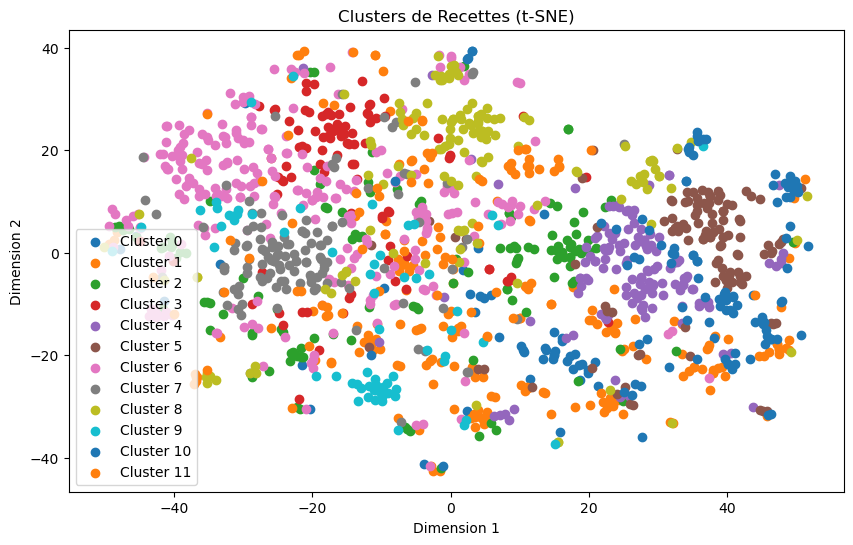

In [215]:
from sklearn.manifold import TSNE

# Réduction de dimension avec t-SNE
tsne = TSNE(n_components=2, random_state=42)
ingredients_tsne = tsne.fit_transform(ingredients_tfidf.toarray())

# Application de KMeans pour effectuer le clustering
num_clusters = 12  # Remplacez X par le nombre de clusters souhaité
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data['cluster'] = kmeans.fit_predict(ingredients_tfidf)

# Représentation graphique des clusters
plt.figure(figsize=(10, 6))
for cluster_id in range(num_clusters):
    cluster_indices = data[data['cluster'] == cluster_id].index
    plt.scatter(ingredients_tsne[cluster_indices, 0], ingredients_tsne[cluster_indices, 1], label=f'Cluster {cluster_id}')

plt.title('Clusters de Recettes (t-SNE)')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

In [17]:
data.to_csv('Recipes.csv', index=False)